In [1]:
import numpy as np
import random
import shutil
from shutil import copyfile
import os
import cv2
from glob import glob
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
#Cria os diretórios e separa o dataset
def cria_diretorio(path):
    if not os.path.exists(path):
        os.mkdir(path)
        print("Diretório "+path+" criado com sucesso")
    else:
        print("Diretório "+path+" já foi criado")

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    content=os.listdir(SOURCE)
    content=random.sample(content,len(content))
    for n,fname in enumerate(content):
        if(n<(SPLIT_SIZE*len(content)) and os.path.getsize(f"{SOURCE}/{fname}")!=0):
            copyfile(f"{SOURCE}/{fname}", f"{TRAINING}/{fname}")
        if(n>=(SPLIT_SIZE*len(content)) and os.path.getsize(f"{SOURCE}/{fname}")!=0):
            copyfile(f"{SOURCE}/{fname}", f"{TESTING}/{fname}")

try:
    old_base_dir='./PANCS'
    base_dir='./PANCS_2'
    cria_diretorio(base_dir)
    train_dir=os.path.join(base_dir, 'Training')
    cria_diretorio(train_dir)
    test_dir=os.path.join(base_dir, 'Testing')
    cria_diretorio(test_dir)
    labels=os.listdir(old_base_dir)

    split_size = .9  #90% para training e 10% para validation
    for label in labels:
        cria_diretorio(f"{train_dir}/{label}")
        cria_diretorio(f"{test_dir}/{label}")
        split_data(f"{old_base_dir}/{label}", f"{train_dir}/{label}", f"{test_dir}/{label}", split_size)
    

except OSError:
    print('Erro ao encontrar diretorio')

Diretório ./PANCS_2 já foi criado
Diretório ./PANCS_2/Training já foi criado
Diretório ./PANCS_2/Testing já foi criado
Diretório ./PANCS_2/Training/Capiçoba já foi criado
Diretório ./PANCS_2/Testing/Capiçoba já foi criado
Diretório ./PANCS_2/Training/Caruru já foi criado
Diretório ./PANCS_2/Testing/Caruru já foi criado
Diretório ./PANCS_2/Training/Serralha já foi criado
Diretório ./PANCS_2/Testing/Serralha já foi criado
Diretório ./PANCS_2/Training/Peixinho já foi criado
Diretório ./PANCS_2/Testing/Peixinho já foi criado
Diretório ./PANCS_2/Training/Beldroegão já foi criado
Diretório ./PANCS_2/Testing/Beldroegão já foi criado
Diretório ./PANCS_2/Training/Urtiga já foi criado
Diretório ./PANCS_2/Testing/Urtiga já foi criado
Diretório ./PANCS_2/Training/Ora-pro-nóbis já foi criado
Diretório ./PANCS_2/Testing/Ora-pro-nóbis já foi criado
Diretório ./PANCS_2/Training/Capuchinha já foi criado
Diretório ./PANCS_2/Testing/Capuchinha já foi criado
Diretório ./PANCS_2/Training/Araruta já foi cri

In [9]:
TRAINING_DIR = train_dir
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = test_dir
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(128,128),
	class_mode='categorical',
  batch_size = 8
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(128,128),
	class_mode='categorical',
  batch_size = 8
)

model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(axis = 3),
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(axis = 3),
    # The third convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(axis = 3),
    # The fourth convolution
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(axis = 3),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(11, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_generator, epochs=30, validation_data = validation_generator, verbose = 1)


Found 755 images belonging to 11 classes.
Found 137 images belonging to 11 classes.
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 63, 63, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 63, 63, 64)        256       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 61, 61, 128)       73856     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 28, 28, 256)       295168    
____________________________________

KeyboardInterrupt: 

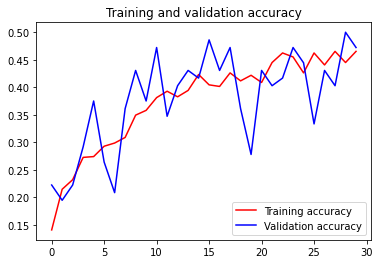

<Figure size 432x288 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()